In [2]:
#import libraries 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_excel("Departures Milan RA.xlsx")
df

,DATE,DAY,FLIGHT,TIME SCHEDULED,TO,TIME OF DEPARTURE,STATUS
0,2024-01-28 00:00:00,domingo,FR1015,05:40:00,PALERMO,05:43:00,ON TIME
1,2024-01-28 00:00:00,domingo,NaN,05:45:00,NUREMBERG,06:13:00,DELAY
2,2024-01-28 00:00:00,domingo,FR5914,05:45:00,NAPLES,05:52:00,ON TIME
3,2024-01-28 00:00:00,domingo,FR2770,05:50:00,BARI,06:06:00,DELAY
4,2024-01-28 00:00:00,domingo,FR5970,06:00:00,MALTA,06:20:00,DELAY
...,...,...,...,...,...,...,...
1503,2024-03-25 00:00:00,lunes,FR1070,19:55:00,CATANIA,21:34,DELAY
1504,2024-03-25 00:00:00,lunes,FR5936,20:35:00,NAPLES,21:12,DELAY
1505,2024-03-25 00:00:00,lunes,FR9689,20:50:00,BRUSSELS,21:05,ON TIME
1506,2024-03-25 00:00:00,lunes,FR1436,20:55:00,LAMEZIA,22:12,DELAY


In [4]:
df.shape

(1508, 7)

In [5]:
df.describe()

,DATE,DAY,FLIGHT,TIME SCHEDULED,TO,TIME OF DEPARTURE,STATUS
count,1508,1508,1500,1508,1508,1508,1508
unique,42,7,309,307,128,600,2
top,09/02/2024,lunes,FR7540,05:45:00,LONDON,20:00,ON TIME
freq,91,306,20,29,58,25,1118


In [6]:
df.dtypes

DATE                  object
DAY                   object
FLIGHT                object
TIME SCHEDULED        object
TO                    object
TIME OF DEPARTURE     object
STATUS                object
dtype: object

In [7]:
df.columns

Index(['DATE', 'DAY', 'FLIGHT', 'TIME SCHEDULED', 'TO', 'TIME OF DEPARTURE ',
       'STATUS '],
      dtype='object')

In [8]:
df.head()

,DATE,DAY,FLIGHT,TIME SCHEDULED,TO,TIME OF DEPARTURE,STATUS
0,2024-01-28 00:00:00,domingo,FR1015,05:40:00,PALERMO,05:43:00,ON TIME
1,2024-01-28 00:00:00,domingo,NaN,05:45:00,NUREMBERG,06:13:00,DELAY
2,2024-01-28 00:00:00,domingo,FR5914,05:45:00,NAPLES,05:52:00,ON TIME
3,2024-01-28 00:00:00,domingo,FR2770,05:50:00,BARI,06:06:00,DELAY
4,2024-01-28 00:00:00,domingo,FR5970,06:00:00,MALTA,06:20:00,DELAY


In [9]:
df.tail()

,DATE,DAY,FLIGHT,TIME SCHEDULED,TO,TIME OF DEPARTURE,STATUS
1503,2024-03-25 00:00:00,lunes,FR1070,19:55:00,CATANIA,21:34,DELAY
1504,2024-03-25 00:00:00,lunes,FR5936,20:35:00,NAPLES,21:12,DELAY
1505,2024-03-25 00:00:00,lunes,FR9689,20:50:00,BRUSSELS,21:05,ON TIME
1506,2024-03-25 00:00:00,lunes,FR1436,20:55:00,LAMEZIA,22:12,DELAY
1507,2024-03-25 00:00:00,lunes,FR8718,21:45:00,LONDON,22:39,DELAY


## Departure analysis 

In [10]:
df.columns

Index(['DATE', 'DAY', 'FLIGHT', 'TIME SCHEDULED', 'TO', 'TIME OF DEPARTURE ',
       'STATUS '],
      dtype='object')

In [12]:
df['DAY'] = df['DAY'].str.lower()

In [26]:
week_days = {'lunes': 'MONDAY', 'martes': 'TUESDAY', 'miércoles': 'WEDNESDAY', 'jueves': 'THURSDAY', 'viernes': 'FRIDAY', 'sábado': 'SATURDAY', 'domingo': 'SUNDAY'}
df['day_name'] = df['DAY'].map(week_days)

In [27]:
flights_per_day = df['day_name'].value_counts()

In [28]:
print("Number of flights per day:")
print(flights_per_day)

Number of flights per day:
day_name
MONDAY       306
TUESDAY      304
SUNDAY       274
THURSDAY     216
FRIDAY       196
WEDNESDAY    127
SATURDAY      85
Name: count, dtype: int64


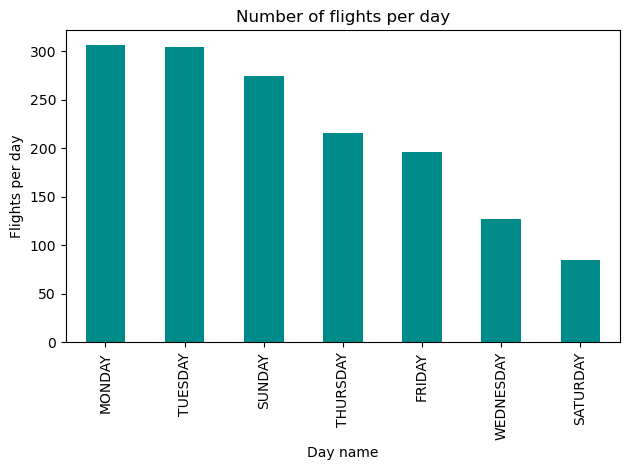

In [29]:
fig, ax = plt.subplots()

flights_per_day.plot(kind='bar', ax=ax, color='darkcyan')

ax.set_xlabel('Day name')
ax.set_ylabel('Flights per day')
ax.set_title('Number of flights per day')

plt.tight_layout()
plt.show()

In [30]:
frequency_of_destination = df['TO'].value_counts()

top_4_countries = frequency_of_destination.head(4)

print("Top 4 frequency of destination:")
print(top_4_countries)

Top 4 frequency of destination:
TO
LONDON      58
CATANIA     55
PALERMO     54
LONDON      47
Name: count, dtype: int64


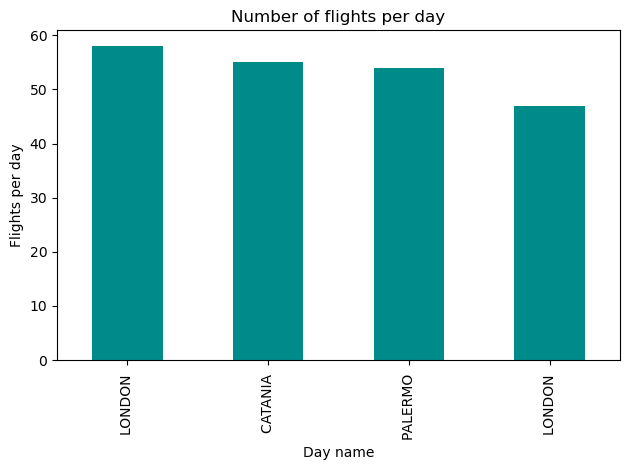

In [31]:
fig, ax = plt.subplots()

top_4_countries.plot(kind='bar', ax=ax, color='darkcyan')

ax.set_xlabel('Day name')
ax.set_ylabel('Flights per day')
ax.set_title('Number of flights per day')

plt.tight_layout()
plt.show()

In [36]:
planes_depature_late_per_day = df[df['STATUS '] == 'DELAY']['DAY'].value_counts()

days_late_planes = planes_depature_late_per_day.idxmax()

print("Days with more planes departuring late:")
print(days_late_planes)

Days with more planes departuring late:
lunes


In [37]:
frequency_departure_time = df['TIME OF DEPARTURE '].value_counts()

common_hour = frequency_departure_time.idxmax()

frequency_common_hour = frequency_departure_time.max()

print("The most common time of departuring is:", common_hour)
print("Most common time frequency:", frequency_common_hour)

The most common time of departuring is: 20:00
Most common time frequency: 25


In [38]:
total_planes = len(df)

planes_departuring_late = (df['STATUS '] == 'DELAY').sum()

percentage_departuring_late = (planes_departuring_late / total_planes) * 100

print("Percentage of planes departuring late: {:.2f}%".format(percentage_departuring_late))

Percentage of planes departuring late: 25.86%


In [39]:
total_planes = len(df)

planes_departuring_on_time = (df['STATUS '] == 'ON TIME').sum()

percentage_departuring_on_time = (planes_departuring_on_time / total_planes) * 100

print("Percentage of planes departuring on time: {:.2f}%".format(percentage_departuring_on_time))

Percentage of planes departuring on time: 74.14%


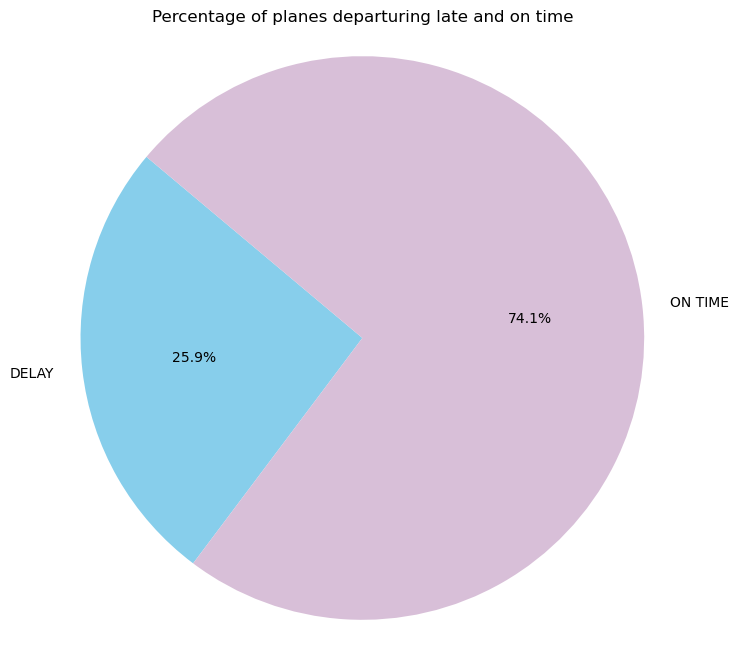

In [40]:
percentage_of_planes_departuring_delay = 25.86
percentage_of_planes_departuring_on_time = 74.14

label = ['DELAY', 'ON TIME']
percentage = [percentage_of_planes_departuring_delay, percentage_of_planes_departuring_on_time]

color = ['skyblue', 'thistle']

plt.figure(figsize=(8, 8)) 
plt.pie(percentage, labels=label, autopct='%1.1f%%', colors=color, startangle=140)

plt.title("Percentage of planes departuring late and on time")

plt.axis('equal')
plt.show()

In [42]:
flights_departuring_late = df[df['STATUS '] == 'DELAY']

delays_per_day = flights_departuring_late['DAY'].value_counts()

delays_per_day = delays_per_day.sort_index()
delays_per_day

DAY
domingo       97
jueves        40
lunes        118
martes        44
miércoles     41
sábado         5
viernes       45
Name: count, dtype: int64

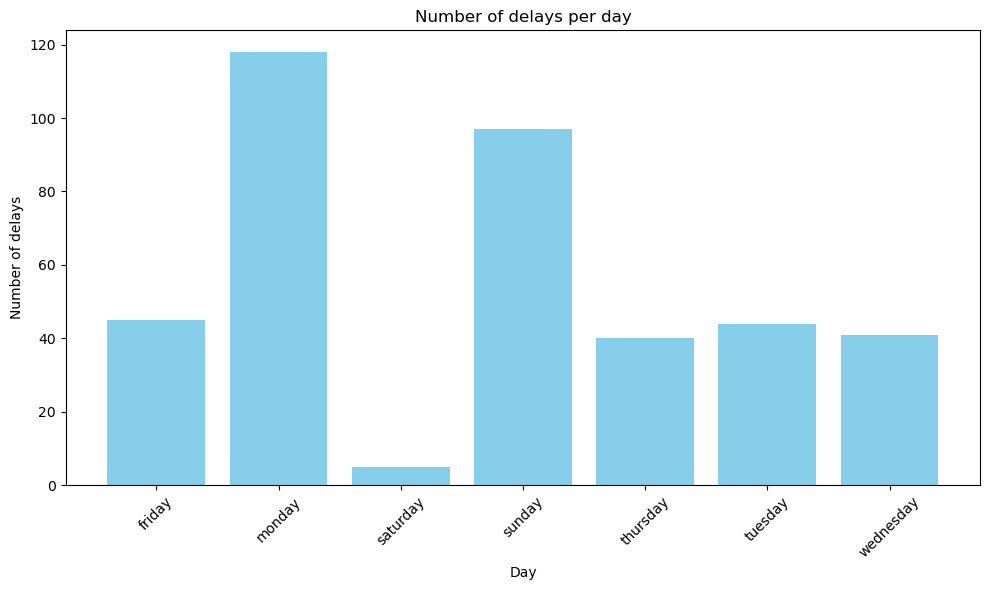

In [44]:
data = {
    'DAY': ['friday', 'monday', 'saturday', 'sunday', 'thursday', 'tuesday', 'wednesday'],
    'number_delays': [45, 118, 5, 97, 40, 44, 41]
}

df1 = pd.DataFrame(data)

days_with_delays = df1[df1['number_delays'] > 0]  

days_with_delays = days_with_delays.drop_duplicates()

days_with_delays = days_with_delays.sort_values(by='DAY')

plt.figure(figsize=(10, 6))
plt.bar(days_with_delays['DAY'], days_with_delays['number_delays'], color='skyblue')

plt.title("Number of delays per day")
plt.xlabel("Day")
plt.ylabel("Number of delays")
plt.xticks(rotation=45)  

plt.tight_layout()
plt.show()

In [47]:
flights_departuring_on_time = df[df['STATUS '] == 'ON TIME']

on_time_per_day = flights_departuring_on_time['DAY'].value_counts()

on_time_per_day = on_time_per_day.sort_index()
on_time_per_day

DAY
domingo      177
jueves       176
lunes        188
martes       260
miércoles     86
sábado        80
viernes      151
Name: count, dtype: int64

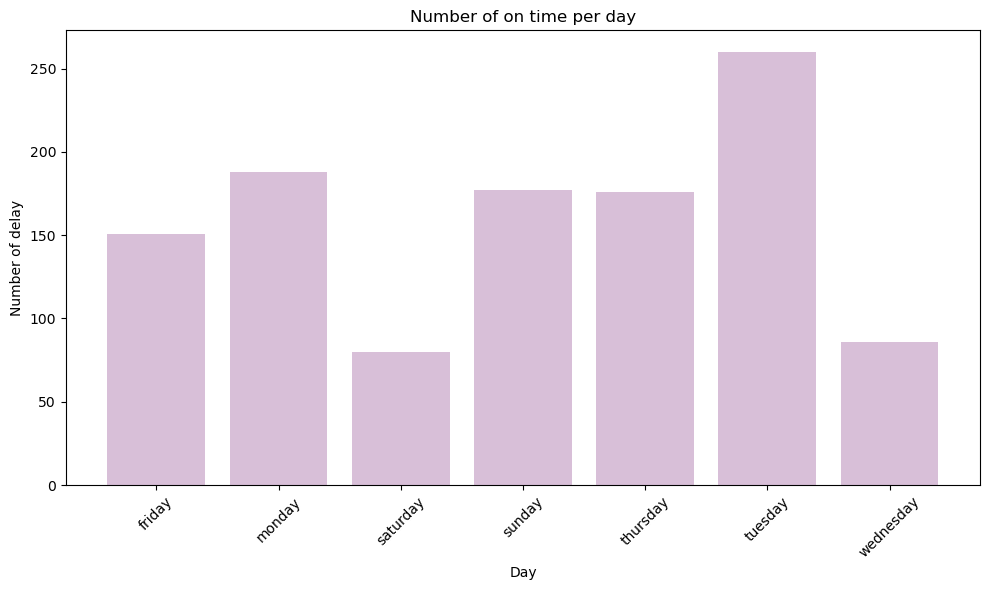

In [49]:
data = {
    'DAY': ['friday', 'monday', 'saturday', 'sunday', 'thursday', 'tuesday', 'wednesday'],
    'number_on_time': [151, 188, 80, 177, 176, 260, 86]
}

df2 = pd.DataFrame(data)

days_on_time = df2[df2['number_on_time'] > 0]  

days_on_time = days_on_time.drop_duplicates()

days_on_time = days_on_time.sort_values(by='DAY')

plt.figure(figsize=(10, 6))
plt.bar(days_on_time['DAY'], days_on_time['number_on_time'], color='thistle')

plt.title("Number of on time per day")
plt.xlabel("Day")
plt.ylabel("Number of delay")
plt.xticks(rotation=45)  

plt.tight_layout()
plt.show()